### Johnatan Josué Ramírez Santiago
### Carné: 19001825

# --------------------     Laborotorio No. 1      --------------------

In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


# Inciso 1

In [36]:
from PIL import Image
import numpy as np

def aplicar_filtro_color(imagen, color):
    img_array = np.array(imagen)
    
# Se creo una copia del array
    resultado_array = np.zeros_like(img_array)
    
# Filtros de color
    if color == 1:

        # Azul
        resultado_array[..., 2] = img_array[..., 2]
    elif color == 2:

        # Verde
        resultado_array[..., 1] = img_array[..., 1]
    elif color == 3:

        # Rojo
        resultado_array[..., 0] = img_array[..., 0]
    elif color == 10:

        # Rojo y verde
        resultado_array[..., 0] = img_array[..., 0]
        resultado_array[..., 1] = img_array[..., 1]
    elif color == 20:

        # Verde y azul
        resultado_array[..., 1] = img_array[..., 1]
        resultado_array[..., 2] = img_array[..., 2]
    elif color == 30:

        # Azul y rojo
        resultado_array[..., 0] = img_array[..., 0]
        resultado_array[..., 2] = img_array[..., 2]
    else:
        raise ValueError("Valor de color no soportado.")

    resultado_imagen = Image.fromarray(resultado_array)
    
    return resultado_imagen

# ---------------------------- MOSTRAR IMAGEN ----------------------------------------------

if __name__ == "__main__":
    imagen_inciso_1 = Image.open("Imagen1.jpg")
    
    # Filtro de color ingresado por el usuario
    color = int(input("Ingrese un número entero: "))
    
    imagen_filtrada = aplicar_filtro_color(imagen_inciso_1, color)
    print(imagen_inciso_1)
    
    # Mostrar imagen
    imagen_filtrada.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=276x183 at 0x255349EF210>


# Inciso 2

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def aplicar_mapa_colores(imagen_gris):
    img_array = np.array(imagen_gris)
    
    colormap = cm.get_cmap('viridis')
    img_color = colormap(img_array / 255.0)  # Normalizar el rango de 0 a 1
    img_color = (img_color[..., :3] * 255).astype(np.uint8)  # Convertir a 8 bits por canal
    imagen_color = Image.fromarray(img_color)
    
    return imagen_color

# -------------------------------- CONVERSION DE IMAGENES --------------------------------
if __name__ == "__main__":

    # Cargamos las imagenes en escala de grises
    imagen_gris = Image.open("imagen2_salida_gray_verde.jpg").convert('L')
    imagen_gris2 = Image.open("imagen2_salida_gray_rojo.jpg").convert('L')
    imagen_gris3 = Image.open("imagen2_salida_gray_azul.jpg").convert('L')
    
    # Aplicamos el mapa de colores
    imagen_color = aplicar_mapa_colores(imagen_gris)
    imagen_color2 = aplicar_mapa_colores(imagen_gris2)
    imagen_color3 = aplicar_mapa_colores(imagen_gris3)

    # Mostrar las imagenes con colores
    imagen_color.show()

    # Exportamos las imagenes
    imagen_color.save("imagen_colorizada1.jpg")

C:\Users\Johnatan Ramirez\AppData\Local\Temp\ipykernel_13072\2402295444.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


# Inciso 3

In [2]:
from PIL import Image
import numpy as np

def crear_imagenes_grises_por_canal(imagen):
    img_array = np.array(imagen)
    
    # Creamos una imagen en escala de grises para cada canal
    canales = ['rojo', 'verde', 'azul']
    imagenes_grises = {}
    
    for i, canal in enumerate(canales):
        gris_array = np.zeros_like(img_array)
        gris_array[..., i] = img_array[..., i]

        imagen_gris = Image.fromarray(gris_array)
        imagen_gris = imagen_gris.convert('L')  # Convertimos a escala de grises
        imagenes_grises[canal] = imagen_gris
    
    return imagenes_grises

# -----------------------------------  RESULTADO ----------------------------------------------------
if __name__ == "__main__":
    # Cargar una imagen a color
    imagen = Image.open("Imagen1.jpg")
    
    # Creamos las imagenes en escala de grises por canal
    imagenes_grises = crear_imagenes_grises_por_canal(imagen)
    
    # Mostramos y guardamos las imagenes generadas
    for canal, imagen_gris in imagenes_grises.items():
        imagen_gris.show(title=f"Escala de Grises - Canal {canal}")
        # Guardamos imagen
        imagen_gris.save(f"imagen_gris_{canal}.jpg")

# Inciso 4

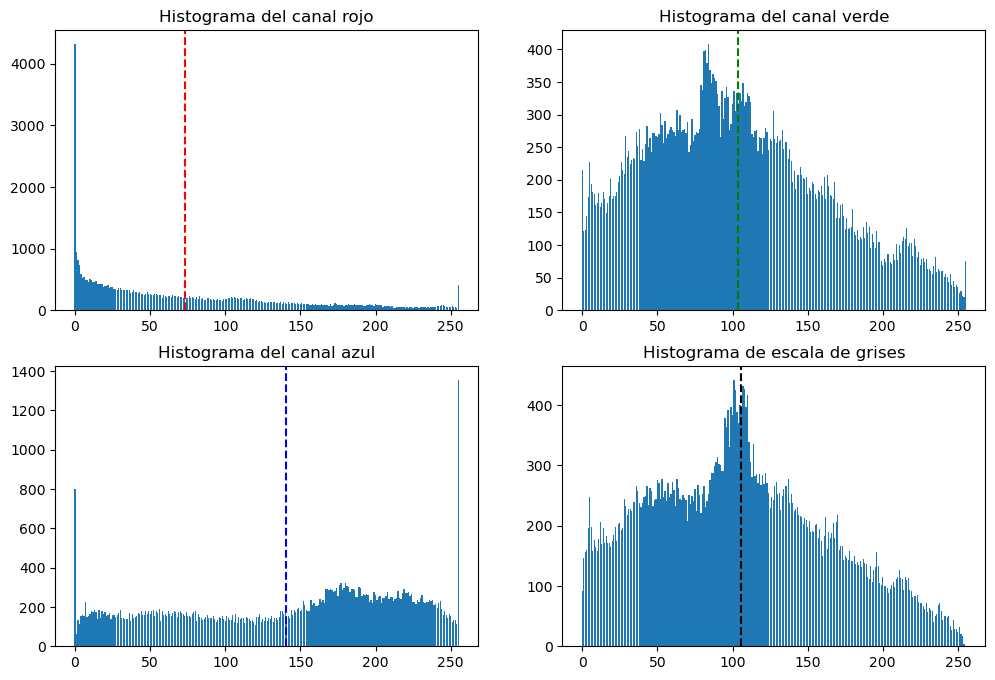

In [3]:
import numpy as np
import matplotlib.pyplot as plt

imagen = Image.open("Imagen_2.jpg")

def calcular_histogramas(imagen):

    if not isinstance(imagen, np.ndarray):
        imagen = np.array(imagen)

    filas, columnas, canales = imagen.shape
    grises = np.mean(imagen, axis=2).astype(np.uint8)

    # Listas
    hist_rojo = [0] * 256
    hist_verde = [0] * 256
    hist_azul = [0] * 256
    hist_gris = [0] * 256

    # Histogramas
    for i in range(filas):
        for j in range(columnas):
            hist_rojo[imagen[i, j, 0]] += 1
            hist_verde[imagen[i, j, 1]] += 1
            hist_azul[imagen[i, j, 2]] += 1
            hist_gris[grises[i, j]] += 1

    # Medias
    media_rojo = np.mean(imagen[:, :, 0])
    media_verde = np.mean(imagen[:, :, 1])
    media_azul = np.mean(imagen[:, :, 2])
    media_gris = np.mean(grises)

    # Figuras y ejes
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Creamos los Histogramas
    axs[0, 0].bar(range(256), hist_rojo)
    axs[0, 0].axvline(x=media_rojo, color='r', linestyle='--')
    axs[0, 0].set_title('Histograma del canal rojo')

    axs[0, 1].bar(range(256), hist_verde)
    axs[0, 1].axvline(x=media_verde, color='g', linestyle='--')
    axs[0, 1].set_title('Histograma del canal verde')

    axs[1, 0].bar(range(256), hist_azul)
    axs[1, 0].axvline(x=media_azul, color='b', linestyle='--')
    axs[1, 0].set_title('Histograma del canal azul')

    axs[1, 1].bar(range(256), hist_gris)
    axs[1, 1].axvline(x=media_gris, color='k', linestyle='--')
    axs[1, 1].set_title('Histograma de escala de grises')

    plt.show()

calcular_histogramas(imagen)

# Inciso 5

##### Es una técnica utilizada en el procesamiento de imágenes para convertir una imagen a color en una imagen en escala de grises. A diferencia del promedio aritmético simple, este método asigna pesos diferentes a los componentes de color rojo, verde y azul (RGB) para obtener una representación más precisa de la luminosidad percibida por el ojo humano.

### ¿Por qué ponderar?
##### Sensibilidad del ojo humano: El ojo humano es más sensible a ciertas frecuencias de luz que a otras. Por ejemplo, es más sensible al verde que al rojo o al azul.

### Aplicaciones: 
##### La elección de los pesos puede variar dependiendo de la aplicación específica. Por ejemplo, en imágenes médicas, se pueden utilizar pesos que realcen ciertos detalles.

In [2]:
def escala_grises_ponderada(imagen, pesos=[0.299, 0.587, 0.114]):

  # Verificamos que la imagen sea de tipo flotante
  if imagen.dtype != np.float32:
    imagen = imagen.astype(np.float32) / 255.0

  # Aplicamos los pesos
  grises = np.dot(imagen, pesos)

  # Escalamos los valores a [0, 1]
  grises *= 255
  grises = np.clip(grises, 0, 255)
  grises = grises.astype(np.uint8)

  return grises

# Ejercicio 6

##### El espacio de color HSV (Hue, Saturation, Value), también conocido como HSB (Hue, Saturation, Brightness), es una representación no lineal del modelo de color RGB. A diferencia de RGB, que se basa en los colores primarios aditivos, HSV se acerca más a cómo los humanos percibimos el color.

##### Tono (Hue): Corresponde al color en sí, expresado como un ángulo en un círculo de colores. El rojo es 0°, el verde 120°, el azul 240°, y así sucesivamente.
##### Saturación (Saturation): Indica la pureza o intensidad del color. Un valor de saturación bajo significa un color más grisáceo o desaturado.
##### Valor (Value) o Brillo (Brightness): Representa la luminosidad o intensidad general del color. Un valor bajo significa un color oscuro, mientras que un valor alto significa un color claro.

### Mapeando Colores de RGB a HSV
##### La conversión de RGB a HSV es un proceso matemático un poco complejo, pero la idea principal es la siguiente:

##### Valor (V): El valor máximo de los componentes RGB de un píxel determina el valor V. Esencialmente, es el canal más brillante en el píxel.
##### Saturación (S): Se calcula la diferencia entre el valor máximo y el mínimo de los componentes RGB. Una diferencia grande indica un color más saturado.
##### Tono (H): Se determina en función de las relaciones entre los componentes RGB. Por ejemplo, si el rojo es el componente más grande, el tono estará cerca de 0°.

### ¿Por qué usar HSV?
##### Intuitivo: Los componentes de HSV son más cercanos a cómo los humanos percibimos el color.
##### Manipulación de colores: Es más fácil ajustar la luminosidad, saturación y tono de una imagen en el espacio HSV.
##### Aplicaciones: Se utiliza en muchas áreas, como edición de imágenes, visión por computadora y gráficos por computadora.